# 2. Árbol de Decisión – low_popularity

Mejorar la detección de canciones no populares.

Usa decisiones tipo “si-entonces” para clasificar las canciones según valores de sus atributos.

Accuracy del modelo: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     31373
           1       0.71      0.70      0.70      5682

    accuracy                           0.91     37055
   macro avg       0.83      0.82      0.83     37055
weighted avg       0.91      0.91      0.91     37055

Imagen guardada en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\matriz_confusion_arbol.png


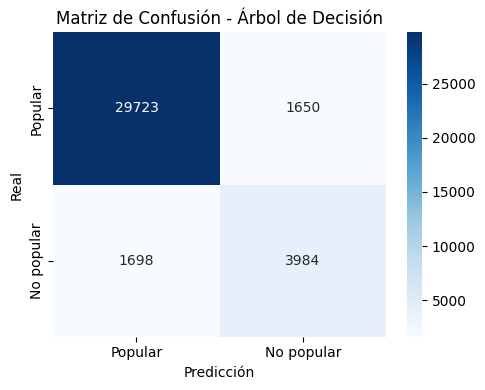

Modelo guardado en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\models\modelo_arbol_low_popularity.pkl


In [1]:
# 1. Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Cargar la base de datos
file_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\data\tracks_limpio_con_low_popularity.csv"
df = pd.read_csv(file_path)

# 3. Definir features y target
features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "valence", "tempo",
    "duration_ms", "explicit", "release_year"
]
target = "low_popularity"

X = df[features]
y = df[target]

# 4. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Crear y entrenar el modelo de Árbol de Decisión
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

# 6. Predicciones y evaluación
y_pred = modelo_arbol.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Popular", "No popular"], yticklabels=["Popular", "No popular"])
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()

# Guardar la imagen
img_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\matriz_confusion_arbol.png"
plt.savefig(img_path, dpi=300)
print(f"Imagen guardada en: {img_path}")
plt.show()

# 7. Guardar el modelo
modelo_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\models\modelo_arbol_low_popularity.pkl"
joblib.dump(modelo_arbol, modelo_path)
print(f"Modelo guardado en: {modelo_path}")
